In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import requests as req

In [2]:
#pull the data 
citi = pd.read_table("../Instructions/worldcitiespop1.txt", sep =",", encoding = "ISO-8859-1", low_memory=False)
citi.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,06,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,06,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,06,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,06,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,06,NaN,42.466667,1.483333


In [3]:
len(citi)

3173958

In [4]:
citi_select = citi.sample(500)
citi_select.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2135182,ph,pajo aguinaldo,Pajo Aguinaldo,30,NaN,10.866667,122.366667
1853604,mw,jentha jembe,Jentha Jembe,21,NaN,-11.050000,34.116667
647638,cn,zengjiageng,Zengjiageng,32,NaN,29.080357,104.028226
2202618,pk,khaprezai tarin,Khaprezai Tarin,02,NaN,30.194346,67.667714
974627,fr,sauret,Sauret,98,NaN,45.993302,2.808298


In [5]:
citi_select_us = citi_select[citi_select["Country"]=="us"]
citi_select_us.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3037066,us,holly ridge,Holly Ridge,VA,NaN,37.638333,-77.392778
3022439,us,goosetown,Goosetown,TN,NaN,35.316667,-84.556944
2946054,us,north american trailer park,North American Trailer Park,IA,NaN,41.338889,-93.558333
2910574,us,oyster bay,Oyster Bay,AL,NaN,30.285278,-87.743056
2952950,us,borodino,Borodino,LA,NaN,31.065833,-91.950833


In [6]:
citi_select["temperature"]= ""
citi_select["Humidity"]= ""
citi_select["Cloudiness"]= ""
citi_select["Wind Speed"]= ""
citi_select.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude,temperature,Humidity,Cloudiness,Wind Speed
2135182,ph,pajo aguinaldo,Pajo Aguinaldo,30,NaN,10.866667,122.366667,,,,
1853604,mw,jentha jembe,Jentha Jembe,21,NaN,-11.050000,34.116667,,,,
647638,cn,zengjiageng,Zengjiageng,32,NaN,29.080357,104.028226,,,,
2202618,pk,khaprezai tarin,Khaprezai Tarin,02,NaN,30.194346,67.667714,,,,
974627,fr,sauret,Sauret,98,NaN,45.993302,2.808298,,,,


In [7]:
#create API_key
api_key = "1597cf78abf9e72d4a4a4ab5f4544757"


In [8]:
# Counter
row_count = 0
bad_requests = 0
# Loop through the table and grab temp , humidity , cloudiness and Wind Speed based on the Long and Lat
for index, row in citi_select.iterrows():
    
    # Create endpoint URL
    
    target_url = "http://api.openweathermap.org/data/2.5/weather?lat=%s&lon=%s&APPID=%s" % (row["Latitude"],row["Longitude"], api_key)
    
    # Print log 
    print("Now retrieving city # " + str(row_count))
    print(target_url)
    row_count += 1
    
      # Run requests to grab the JSON at the requested URL
    citi_weather = req.get(target_url).json()
    print(json.dumps(citi_weather, indent=2, sort_keys=True))
    
    # Use try / except to skip any cities with errors
    try: 
        citi_temp = citi_weather["main"]["temp"]
        citi_humidity = citi_weather["main"]["humidity"]
        citi_Wind_Speed = citi_weather["wind"]["speed"]
        citi_Cloudiness = citi_weather["clouds"]["all"]
        
        citi_select.set_value(index, "temperature", citi_temp)
        citi_select.set_value(index, "Humidity", citi_humidity)
        citi_select.set_value(index, "Cloudiness", citi_Cloudiness)
        citi_select.set_value(index, "Wind Speed", citi_Wind_Speed)
        
    except IndexError:
        print("Error with city data. Skipping")
        bad_requests += 1
        if bad_requests > 10:
            break
        continue
    

Now retrieving city # 0
http://api.openweathermap.org/data/2.5/weather?lat=10.866667&lon=122.36666699999999&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 44
  },
  "cod": 200,
  "coord": {
    "lat": 10.87,
    "lon": 122.37
  },
  "dt": 1512928983,
  "id": 1706844,
  "main": {
    "grnd_level": 1001.84,
    "humidity": 95,
    "pressure": 1001.84,
    "sea_level": 1022.07,
    "temp": 296.357,
    "temp_max": 296.357,
    "temp_min": 296.357
  },
  "name": "Leon",
  "sys": {
    "country": "PH",
    "message": 0.0037,
    "sunrise": 1512856707,
    "sunset": 1512898122
  },
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 326.001,
    "speed": 1.32
  }
}
Now retrieving city # 1
http://api.openweathermap.org/data/2.5/weather?lat=-11.05&lon=34.1166667&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 8

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 56.15,
    "lon": 35.5
  },
  "dt": 1512928987,
  "id": 486845,
  "main": {
    "grnd_level": 995.6,
    "humidity": 95,
    "pressure": 995.6,
    "sea_level": 1016.88,
    "temp": 275.457,
    "temp_max": 275.457,
    "temp_min": 275.457
  },
  "name": "Sudislovo",
  "rain": {
    "3h": 0.17
  },
  "sys": {
    "country": "RU",
    "message": 0.2928,
    "sunrise": 1512885588,
    "sunset": 1512910941
  },
  "weather": [
    {
      "description": "light rain",
      "icon": "10n",
      "id": 500,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 145.001,
    "speed": 7.17
  }
}
Now retrieving city # 11
http://api.openweathermap.org/data/2.5/weather?lat=-25.021542999999998&lon=-48.516842&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -25.02,
    "lon": -48.52
  },
  "dt": 1512928987,
  "id": 3461086,

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 40.01,
    "lon": 123.39
  },
  "dt": 1512928991,
  "id": 2033916,
  "main": {
    "grnd_level": 1020.81,
    "humidity": 36,
    "pressure": 1020.81,
    "sea_level": 1038.68,
    "temp": 260.307,
    "temp_max": 260.307,
    "temp_min": 260.307
  },
  "name": "Yanghe",
  "sys": {
    "country": "CN",
    "message": 0.2209,
    "sunrise": 1512860264,
    "sunset": 1512894069
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 326.001,
    "speed": 4.82
  }
}
Now retrieving city # 23
http://api.openweathermap.org/data/2.5/weather?lat=-3.0573&lon=119.5625&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 56
  },
  "cod": 200,
  "coord": {
    "lat": -3.06,
    "lon": 119.56
  },
  "dt": 1512928991,
  "id": 7385748,
  "main": {
    "grnd_level": 882.84,
    

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": -3.63,
    "lon": 29.62
  },
  "dt": 1512928996,
  "id": 423794,
  "main": {
    "grnd_level": 856.5,
    "humidity": 100,
    "pressure": 856.5,
    "sea_level": 1023.12,
    "temp": 290.957,
    "temp_max": 290.957,
    "temp_min": 290.957
  },
  "name": "Mwaro",
  "rain": {
    "3h": 1.6175
  },
  "sys": {
    "country": "BI",
    "message": 0.191,
    "sunrise": 1512877488,
    "sunset": 1512921878
  },
  "weather": [
    {
      "description": "light rain",
      "icon": "10n",
      "id": 500,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 174.001,
    "speed": 1.52
  }
}
Now retrieving city # 34
http://api.openweathermap.org/data/2.5/weather?lat=26.395023&lon=68.05140899999999&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 26.4,
    "lon": 68.05
  },
  "dt": 1512925200,
  "id": 1180397,
  "ma

{
  "base": "stations",
  "clouds": {
    "all": 5
  },
  "cod": 200,
  "coord": {
    "lat": 37.24,
    "lon": 127.59
  },
  "dt": 1512925200,
  "id": 1843880,
  "main": {
    "humidity": 38,
    "pressure": 1021,
    "temp": 270.91,
    "temp_max": 272.15,
    "temp_min": 270.15
  },
  "name": "Hwapyeongri",
  "sys": {
    "country": "KR",
    "id": 7671,
    "message": 0.2159,
    "sunrise": 1512858779,
    "sunset": 1512893538,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "02n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 310,
    "speed": 3.6
  }
}
Now retrieving city # 44
http://api.openweathermap.org/data/2.5/weather?lat=-20.132777800000003&lon=57.5933333&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": -20.13,
    "lon": 57.59
  },
  "dt": 1512925200,
  "id": 1106625,
  "main": {
    "humidity": 69,
 

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 38.43,
    "lon": 36.56
  },
  "dt": 1512929005,
  "id": 301546,
  "main": {
    "grnd_level": 833.48,
    "humidity": 63,
    "pressure": 833.48,
    "sea_level": 1038.03,
    "temp": 261.632,
    "temp_max": 261.632,
    "temp_min": 261.632
  },
  "name": "Sariz",
  "sys": {
    "country": "TR",
    "message": 0.1795,
    "sunrise": 1512880838,
    "sunset": 1512915188
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 153.001,
    "speed": 0.87
  }
}
Now retrieving city # 55
http://api.openweathermap.org/data/2.5/weather?lat=6.403446&lon=100.131913&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 6.4,
    "lon": 100.13
  },
  "dt": 1512925200,
  "id": 1736292,
  "main": {
    "humidity": 94,
    "pressure"

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 36.47,
    "lon": 2.83
  },
  "dt": 1512927000,
  "id": 2503769,
  "main": {
    "humidity": 67,
    "pressure": 1015,
    "temp": 288.15,
    "temp_max": 288.15,
    "temp_min": 288.15
  },
  "name": "Blida",
  "sys": {
    "country": "DZ",
    "id": 6194,
    "message": 0.1845,
    "sunrise": 1512888612,
    "sunset": 1512923609,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04n",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 220,
    "speed": 2.1
  }
}
Now retrieving city # 66
http://api.openweathermap.org/data/2.5/weather?lat=37.516667&lon=-4.066667&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 37.52,
    "lon": -4.07
  },
  "dt": 1512927000,
  "id": 6357226,
  "main": {
    "humidity": 81,
    "pressure":

{
  "base": "stations",
  "clouds": {
    "all": 56
  },
  "cod": 200,
  "coord": {
    "lat": 16.09,
    "lon": 119.84
  },
  "dt": 1512929014,
  "id": 1727340,
  "main": {
    "grnd_level": 1020.08,
    "humidity": 100,
    "pressure": 1020.08,
    "sea_level": 1023.16,
    "temp": 299.632,
    "temp_max": 299.632,
    "temp_min": 299.632
  },
  "name": "Bangan-Oda",
  "sys": {
    "country": "PH",
    "message": 0.1972,
    "sunrise": 1512857874,
    "sunset": 1512898169
  },
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04n",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 117.001,
    "speed": 2.12
  }
}
Now retrieving city # 77
http://api.openweathermap.org/data/2.5/weather?lat=9.9666667&lon=-11.816666699999999&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 9.97,
    "lon": -11.82
  },
  "dt": 1512929015,
  "id": 2417834,
  "main": {
    "grn

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 15.5,
    "lon": -16.37
  },
  "dt": 1512925200,
  "id": 2251354,
  "main": {
    "humidity": 22,
    "pressure": 1011,
    "temp": 305.15,
    "temp_max": 305.15,
    "temp_min": 305.15
  },
  "name": "Gouye Gal",
  "sys": {
    "country": "SN",
    "id": 6168,
    "message": 0.2021,
    "sunrise": 1512890513,
    "sunset": 1512930932,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 60,
    "speed": 2.1
  }
}
Now retrieving city # 88
http://api.openweathermap.org/data/2.5/weather?lat=7.816667&lon=33.033333&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 7.82,
    "lon": 33.03
  },
  "dt": 1512929019,
  "id": 377252,
  "main": {
    "grnd_level": 986.2,
    "humidity": 

{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": -8.61,
    "lon": 116.22
  },
  "dt": 1512927000,
  "id": 7335979,
  "main": {
    "humidity": 94,
    "pressure": 1011,
    "temp": 298.15,
    "temp_max": 298.15,
    "temp_min": 298.15
  },
  "name": "Sintung Timur",
  "sys": {
    "country": "ID",
    "id": 8001,
    "message": 0.1974,
    "sunrise": 1512856182,
    "sunset": 1512901604,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 180.501,
    "speed": 0.72
  }
}
Now retrieving city # 99
http://api.openweathermap.org/data/2.5/weather?lat=34.2522222&lon=35.984444399999994&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 34.25,
    "lon": 35.98
  },
  "dt": 1512925200,
  "id": 276359,
  "main": {
    "humi

{
  "base": "stations",
  "clouds": {
    "all": 12
  },
  "cod": 200,
  "coord": {
    "lat": 7.09,
    "lon": 30.15
  },
  "dt": 1512929029,
  "id": 408647,
  "main": {
    "grnd_level": 975.58,
    "humidity": 60,
    "pressure": 975.58,
    "sea_level": 1020.93,
    "temp": 298.857,
    "temp_max": 298.857,
    "temp_min": 298.857
  },
  "name": "Lakes State",
  "sys": {
    "country": "SS",
    "message": 0.2254,
    "sunrise": 1512878455,
    "sunset": 1512920654
  },
  "weather": [
    {
      "description": "few clouds",
      "icon": "02n",
      "id": 801,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 355.001,
    "speed": 2.52
  }
}
Now retrieving city # 110
http://api.openweathermap.org/data/2.5/weather?lat=-7.383611&lon=111.33444399999999&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 80
  },
  "cod": 200,
  "coord": {
    "lat": -7.38,
    "lon": 111.33
  },
  "dt": 1512929029,
  "id": 6410546,
  "main": {
    "grnd_leve

{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 13.68,
    "lon": -87.5
  },
  "dt": 1512925200,
  "id": 3602284,
  "main": {
    "humidity": 59,
    "pressure": 1026,
    "temp": 290.15,
    "temp_max": 290.15,
    "temp_min": 290.15
  },
  "name": "San Francisco de Coray",
  "sys": {
    "country": "HN",
    "id": 4196,
    "message": 0.2034,
    "sunrise": 1512907393,
    "sunset": 1512948205,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "few clouds",
      "icon": "02d",
      "id": 801,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 9.0011,
    "speed": 5.97
  }
}
Now retrieving city # 120
http://api.openweathermap.org/data/2.5/weather?lat=35.583333&lon=52.15&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 35.58,
    "lon": 52.15
  },
  "dt": 1512929033,
  "id": 138042,
  "main": {
    "grnd_level": 867

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 57.53,
    "lon": 30.42
  },
  "dt": 1512929037,
  "id": 566868,
  "main": {
    "grnd_level": 1003.22,
    "humidity": 94,
    "pressure": 1003.22,
    "sea_level": 1013.84,
    "temp": 271.657,
    "temp_max": 271.657,
    "temp_min": 271.657
  },
  "name": "Dedovichi",
  "sys": {
    "country": "RU",
    "message": 0.2048,
    "sunrise": 1512887390,
    "sunset": 1512911578
  },
  "weather": [
    {
      "description": "overcast clouds",
      "icon": "04n",
      "id": 804,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 178.001,
    "speed": 1.97
  }
}
Now retrieving city # 131
http://api.openweathermap.org/data/2.5/weather?lat=50.15&lon=12.533333&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 50.15,
    "lon": 12.53
  },
  "dt": 1512928560,
  "id": 3072394,
  "main": {
    "humidity": 92,
  

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 26.84,
    "lon": 54.22
  },
  "dt": 1512925200,
  "id": 126914,
  "main": {
    "humidity": 49,
    "pressure": 1019,
    "temp": 293.05,
    "temp_max": 294.15,
    "temp_min": 292.15
  },
  "name": "Kish",
  "sys": {
    "country": "IR",
    "id": 7020,
    "message": 0.2042,
    "sunrise": 1512874896,
    "sunset": 1512912653,
    "type": 1
  },
  "visibility": 8000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 300,
    "speed": 2.1
  }
}
Now retrieving city # 142
http://api.openweathermap.org/data/2.5/weather?lat=-3.1993&lon=119.5441&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 56
  },
  "cod": 200,
  "coord": {
    "lat": -3.2,
    "lon": 119.54
  },
  "dt": 1512929043,
  "id": 1636045,
  "main": {
    "grnd_level": 882.84,
    "humidity": 96,

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 28.07,
    "lon": 114.18
  },
  "dt": 1512929046,
  "id": 1783813,
  "main": {
    "grnd_level": 1003.22,
    "humidity": 74,
    "pressure": 1003.22,
    "sea_level": 1039.45,
    "temp": 269.782,
    "temp_max": 269.782,
    "temp_min": 269.782
  },
  "name": "Zhutan",
  "sys": {
    "country": "CN",
    "message": 0.2061,
    "sunrise": 1512860658,
    "sunset": 1512898100
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 78.5011,
    "speed": 1.22
  }
}
Now retrieving city # 153
http://api.openweathermap.org/data/2.5/weather?lat=-7.05&lon=155.65&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -7.05,
    "lon": 155.65
  },
  "dt": 1512929047,
  "id": 2088659,
  "main": {
    "grnd_level": 1019.51,
    "hu

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 32.91,
    "lon": 113.41
  },
  "dt": 1512929050,
  "id": 1806460,
  "main": {
    "grnd_level": 1017,
    "humidity": 49,
    "pressure": 1017,
    "sea_level": 1041.07,
    "temp": 271.157,
    "temp_max": 271.157,
    "temp_min": 271.157
  },
  "name": "Jialou",
  "sys": {
    "country": "CN",
    "message": 0.1903,
    "sunrise": 1512861513,
    "sunset": 1512897614
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 345.501,
    "speed": 2.42
  }
}
Now retrieving city # 164
http://api.openweathermap.org/data/2.5/weather?lat=40.486389&lon=48.218333&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 40.49,
    "lon": 48.22
  },
  "dt": 1512929051,
  "id": 587342,
  "main": {
    "grnd_level": 1037.02,
    "hum

{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": 57.17,
    "lon": 24.11
  },
  "dt": 1512928200,
  "id": 7628326,
  "main": {
    "humidity": 100,
    "pressure": 998,
    "temp": 271.15,
    "temp_max": 271.15,
    "temp_min": 271.15
  },
  "name": "Carnikavas Novads",
  "sys": {
    "country": "LV",
    "id": 7368,
    "message": 0.2096,
    "sunrise": 1512888748,
    "sunset": 1512913250,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 180,
    "speed": 3.6
  }
}
Now retrieving city # 175
http://api.openweathermap.org/data/2.5/weather?lat=54.013712&lon=18.916386&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 54.01,
    "lon": 18.92
  },
  "dt": 1512927000,
  "id": 3091760,
  "main": {
    "humidity": 86

{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 14.84,
    "lon": 104.03
  },
  "dt": 1512929060,
  "id": 1607251,
  "main": {
    "grnd_level": 1009.78,
    "humidity": 71,
    "pressure": 1009.78,
    "sea_level": 1026.65,
    "temp": 295.857,
    "temp_max": 295.857,
    "temp_min": 295.857
  },
  "name": "Prang Ku",
  "sys": {
    "country": "TH",
    "message": 0.1902,
    "sunrise": 1512861534,
    "sunset": 1512902101
  },
  "weather": [
    {
      "description": "few clouds",
      "icon": "02n",
      "id": 801,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 42.5011,
    "speed": 3.97
  }
}
Now retrieving city # 186
http://api.openweathermap.org/data/2.5/weather?lat=23.820017&lon=114.79653400000001&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 23.82,
    "lon": 114.8
  },
  "dt": 1512929061,
  "id": 1790374,
  "main": {
    "grnd_leve

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 44.88,
    "lon": 16.46
  },
  "dt": 1512927000,
  "id": 3189236,
  "main": {
    "humidity": 74,
    "pressure": 1006,
    "temp": 275.15,
    "temp_max": 275.15,
    "temp_min": 275.15
  },
  "name": "Svodna",
  "sys": {
    "country": "BA",
    "id": 5966,
    "message": 0.1855,
    "sunrise": 1512886899,
    "sunset": 1512918776,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 200,
    "speed": 2.6
  }
}
Now retrieving city # 197
http://api.openweathermap.org/data/2.5/weather?lat=36.388611100000006&lon=-114.8702778&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 1
  },
  "cod": 200,
  "coord": {
    "lat": 36.39,
    "lon": -114.87
  },
  "dt": 1512928680,
  "id": 7261960,
  "main": {
    "humidity": 18,
    "

{
  "base": "stations",
  "clouds": {
    "all": 8
  },
  "cod": 200,
  "coord": {
    "lat": 37,
    "lon": 48.78
  },
  "dt": 1512929068,
  "id": 111453,
  "main": {
    "grnd_level": 855.28,
    "humidity": 70,
    "pressure": 855.28,
    "sea_level": 1037.02,
    "temp": 262.657,
    "temp_max": 262.657,
    "temp_min": 262.657
  },
  "name": "Zanjan",
  "sys": {
    "country": "IR",
    "message": 0.2575,
    "sunrise": 1512877665,
    "sunset": 1512912494
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "02n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 232.001,
    "speed": 0.77
  }
}
Now retrieving city # 208
http://api.openweathermap.org/data/2.5/weather?lat=55.527106999999994&lon=34.813165999999995&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 55.53,
    "lon": 34.81
  },
  "dt": 1512929069,
  "id": 562237,
  "main": {
    "grnd_level":

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 14.19,
    "lon": 120.84
  },
  "dt": 1512925200,
  "id": 1726252,
  "main": {
    "humidity": 100,
    "pressure": 1010,
    "temp": 300.15,
    "temp_max": 300.15,
    "temp_min": 300.15
  },
  "name": "Batas",
  "sys": {
    "country": "PH",
    "id": 7706,
    "message": 0.0051,
    "sunrise": 1512857427,
    "sunset": 1512898136,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04n",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 25.0011,
    "speed": 3.42
  }
}
Now retrieving city # 219
http://api.openweathermap.org/data/2.5/weather?lat=23.1319444&lon=-82.17833329999999&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 23.13,
    "lon": -82.18
  },
  "dt": 1512924900,
  "id": 3542759,
  "main": {
    "humidity":

}
Now retrieving city # 229
http://api.openweathermap.org/data/2.5/weather?lat=6.116666700000001&lon=-0.7&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 8
  },
  "cod": 200,
  "coord": {
    "lat": 6.12,
    "lon": -0.7
  },
  "dt": 1512929077,
  "id": 2304931,
  "main": {
    "grnd_level": 999.49,
    "humidity": 75,
    "pressure": 999.49,
    "sea_level": 1023,
    "temp": 299.557,
    "temp_max": 299.557,
    "temp_min": 299.557
  },
  "name": "Akwatia",
  "sys": {
    "country": "GH",
    "message": 0.1915,
    "sunrise": 1512885762,
    "sunset": 1512928160
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "02n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 180.001,
    "speed": 1.77
  }
}
Now retrieving city # 230
http://api.openweathermap.org/data/2.5/weather?lat=21.95&lon=106.7&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 64
  },
  "cod": 200,

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 47.53,
    "lon": 9.03
  },
  "dt": 1512928200,
  "id": 2661844,
  "main": {
    "humidity": 80,
    "pressure": 993,
    "temp": 278.94,
    "temp_max": 280.15,
    "temp_min": 278.15
  },
  "name": "Affeltrangen",
  "sys": {
    "country": "CH",
    "id": 4915,
    "message": 0.2807,
    "sunrise": 1512889289,
    "sunset": 1512919953,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "light rain",
      "icon": "10n",
      "id": 500,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 190,
    "speed": 8.7
  }
}
Now retrieving city # 240
http://api.openweathermap.org/data/2.5/weather?lat=-2.35&lon=29.6666667&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": -2.35,
    "lon": 29.67
  },
  "dt": 1512929082,
  "id": 6413341,
  "main": {
    "grnd_level": 819.45,
    "humid

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 37.28,
    "lon": 57.59
  },
  "dt": 1512925200,
  "id": 135298,
  "main": {
    "humidity": 86,
    "pressure": 1022,
    "temp": 271.15,
    "temp_max": 271.15,
    "temp_min": 271.15
  },
  "name": "Esfarayen",
  "sys": {
    "country": "IR",
    "id": 7044,
    "message": 0.198,
    "sunrise": 1512875595,
    "sunset": 1512910333,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 169.501,
    "speed": 0.82
  }
}
Now retrieving city # 250
http://api.openweathermap.org/data/2.5/weather?lat=38.4880556&lon=-76.7286111&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 38.49,
    "lon": -76.73
  },
  "dt": 1512928200,
  "id": 4356350,
  "main": {
    "humidity": 64,
    "pre

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 31.3,
    "lon": 121.08
  },
  "dt": 1512927000,
  "id": 1807046,
  "main": {
    "humidity": 64,
    "pressure": 1025,
    "temp": 276.15,
    "temp_max": 276.15,
    "temp_min": 276.15
  },
  "name": "Huaqiao",
  "sys": {
    "country": "CN",
    "id": 7452,
    "message": 0.2132,
    "sunrise": 1512859440,
    "sunset": 1512896004,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 210,
    "speed": 2
  }
}
Now retrieving city # 261
http://api.openweathermap.org/data/2.5/weather?lat=51.8242&lon=40.1965&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": 51.82,
    "lon": 40.2
  },
  "dt": 1512927000,
  "id": 511437,
  "main": {
    "humidity": 93,
    "pressure": 1009,
   

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 36.72,
    "lon": 41
  },
  "dt": 1512925200,
  "id": 173813,
  "main": {
    "humidity": 73,
    "pressure": 1024,
    "temp": 277.73,
    "temp_max": 278.15,
    "temp_min": 277.15
  },
  "name": "Mu\u1e29\u0101faz\u0327at al \u1e28asakah",
  "sys": {
    "country": "SY",
    "id": 7168,
    "message": 0.1859,
    "sunrise": 1512879487,
    "sunset": 1512914407,
    "type": 1
  },
  "visibility": 9000,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04n",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 340,
    "speed": 2.6
  }
}
Now retrieving city # 272
http://api.openweathermap.org/data/2.5/weather?lat=46.588187&lon=2.610861&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 46.59,
    "lon": 2.61
  },
  "dt": 1512927000,
  "id": 2994805,
  "main": {
    

{
  "base": "stations",
  "clouds": {
    "all": 76
  },
  "cod": 200,
  "coord": {
    "lat": 57.49,
    "lon": 28.82
  },
  "dt": 1512925200,
  "id": 7093622,
  "main": {
    "humidity": 100,
    "pressure": 1001,
    "temp": 270.15,
    "temp_max": 270.15,
    "temp_min": 270.15
  },
  "name": "Devonisovo",
  "sys": {
    "country": "RU",
    "id": 7270,
    "message": 0.1723,
    "sunrise": 1512887757,
    "sunset": 1512911980,
    "type": 1
  },
  "visibility": 4800,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04n",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 140,
    "speed": 1
  }
}
Now retrieving city # 283
http://api.openweathermap.org/data/2.5/weather?lat=59.872868000000004&lon=29.947946&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 59.87,
    "lon": 29.95
  },
  "dt": 1512927000,
  "id": 462320,
  "main": {
    "humidity": 99,
  

{
  "base": "stations",
  "clouds": {
    "all": 8
  },
  "cod": 200,
  "coord": {
    "lat": 6.75,
    "lon": 101.07
  },
  "dt": 1512929105,
  "id": 1609820,
  "main": {
    "grnd_level": 1010.84,
    "humidity": 93,
    "pressure": 1010.84,
    "sea_level": 1025.43,
    "temp": 294.482,
    "temp_max": 294.482,
    "temp_min": 294.482
  },
  "name": "Khok Pho",
  "sys": {
    "country": "TH",
    "message": 0.2693,
    "sunrise": 1512861394,
    "sunset": 1512903664
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "02n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 93.5011,
    "speed": 0.82
  }
}
Now retrieving city # 294
http://api.openweathermap.org/data/2.5/weather?lat=61.4&lon=23.15&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 61.4,
    "lon": 23.15
  },
  "dt": 1512928200,
  "id": 645800,
  "main": {
    "humidity": 89,
    "pressure": 9

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 50.93,
    "lon": 5.5
  },
  "dt": 1512928500,
  "id": 2790212,
  "main": {
    "humidity": 81,
    "pressure": 975,
    "temp": 280,
    "temp_max": 281.15,
    "temp_min": 279.15
  },
  "name": "Nieuwdak",
  "sys": {
    "country": "BE",
    "id": 5205,
    "message": 0.271,
    "sunrise": 1512891032,
    "sunset": 1512919904,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "light intensity drizzle",
      "icon": "09n",
      "id": 300,
      "main": "Drizzle"
    },
    {
      "description": "moderate rain",
      "icon": "10n",
      "id": 501,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 220,
    "gust": 23.1,
    "speed": 15.4
  }
}
Now retrieving city # 305
http://api.openweathermap.org/data/2.5/weather?lat=42.756111&lon=18.83&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "c

{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": -7.27,
    "lon": 112.45
  },
  "dt": 1512925200,
  "id": 6786208,
  "main": {
    "humidity": 83,
    "pressure": 1009,
    "temp": 300.15,
    "temp_max": 300.15,
    "temp_min": 300.15
  },
  "name": "Ngasin",
  "sys": {
    "country": "ID",
    "id": 8024,
    "message": 0.2016,
    "sunrise": 1512857227,
    "sunset": 1512902369,
    "type": 1
  },
  "visibility": 8000,
  "weather": [
    {
      "description": "few clouds",
      "icon": "02n",
      "id": 801,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 180,
    "speed": 2.6
  }
}
Now retrieving city # 316
http://api.openweathermap.org/data/2.5/weather?lat=2.0333333&lon=10.566666699999999&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 2.03,
    "lon": 10.57
  },
  "dt": 1512929116,
  "id": 2307502,
  "main": {
    "grnd_level": 972.01,
 

{
  "base": "stations",
  "clouds": {
    "all": 36
  },
  "cod": 200,
  "coord": {
    "lat": 32.25,
    "lon": 39.6
  },
  "dt": 1512929120,
  "id": 98677,
  "main": {
    "grnd_level": 938.45,
    "humidity": 47,
    "pressure": 938.45,
    "sea_level": 1038.16,
    "temp": 277.532,
    "temp_max": 277.532,
    "temp_min": 277.532
  },
  "name": "Ar Rutbah",
  "sys": {
    "country": "IQ",
    "message": 0.1865,
    "sunrise": 1512879141,
    "sunset": 1512915427
  },
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 147.501,
    "speed": 4.32
  }
}
Now retrieving city # 327
http://api.openweathermap.org/data/2.5/weather?lat=46.315406&lon=18.594116&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 46.32,
    "lon": 18.59
  },
  "dt": 1512924300,
  "id": 3048444,
  "main": {
    "humidity": 64,
  

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 36.24,
    "lon": 36.43
  },
  "dt": 1512924600,
  "id": 169866,
  "main": {
    "humidity": 75,
    "pressure": 1025,
    "temp": 281.15,
    "temp_max": 281.15,
    "temp_min": 281.15
  },
  "name": "Harim",
  "sys": {
    "country": "SY",
    "id": 6080,
    "message": 0.2248,
    "sunrise": 1512880507,
    "sunset": 1512915581,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04n",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 330,
    "speed": 1.5
  }
}
Now retrieving city # 337
http://api.openweathermap.org/data/2.5/weather?lat=36.611798&lon=52.99085&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 36.61,
    "lon": 52.99
  },
  "dt": 1512925200,
  "id": 129933,
  "main": {
    "humidity": 86,
    "pressure": 1

{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": 23.92,
    "lon": 120.72
  },
  "dt": 1512925200,
  "id": 1669321,
  "main": {
    "humidity": 82,
    "pressure": 1016,
    "temp": 289.15,
    "temp_max": 289.15,
    "temp_min": 289.15
  },
  "name": "Shibazhang",
  "sys": {
    "country": "TW",
    "id": 7499,
    "message": 0.2025,
    "sunrise": 1512858564,
    "sunset": 1512897055,
    "type": 1
  },
  "visibility": 4800,
  "weather": [
    {
      "description": "mist",
      "icon": "50n",
      "id": 701,
      "main": "Mist"
    }
  ],
  "wind": {
    "deg": 20,
    "speed": 7.2
  }
}
Now retrieving city # 348
http://api.openweathermap.org/data/2.5/weather?lat=35.752311999999996&lon=127.81753300000001&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 64
  },
  "cod": 200,
  "coord": {
    "lat": 35.75,
    "lon": 127.82
  },
  "dt": 1512929129,
  "id": 1894079,
  "main": {
    "grnd_level": 981

{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 51.07,
    "lon": 16.88
  },
  "dt": 1512928800,
  "id": 3085357,
  "main": {
    "humidity": 85,
    "pressure": 990,
    "temp": 273.15,
    "temp_max": 273.15,
    "temp_min": 273.15
  },
  "name": "Smolec",
  "sys": {
    "country": "PL",
    "id": 5375,
    "message": 0.0036,
    "sunrise": 1512888340,
    "sunset": 1512917132,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "light snow",
      "icon": "13n",
      "id": 600,
      "main": "Snow"
    }
  ],
  "wind": {
    "deg": 150,
    "speed": 5.7
  }
}
Now retrieving city # 359
http://api.openweathermap.org/data/2.5/weather?lat=46.855153&lon=19.298616&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 46.86,
    "lon": 19.3
  },
  "dt": 1512927000,
  "id": 3045017,
  "main": {
    "humidity": 64,
    "pressure": 1007

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 24.54,
    "lon": 115.81
  },
  "dt": 1512929138,
  "id": 1813097,
  "main": {
    "grnd_level": 992.44,
    "humidity": 74,
    "pressure": 992.44,
    "sea_level": 1034.71,
    "temp": 278.632,
    "temp_max": 278.632,
    "temp_min": 278.632
  },
  "name": "Dazhe",
  "sys": {
    "country": "CN",
    "message": 0.0029,
    "sunrise": 1512859819,
    "sunset": 1512898157
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 352.501,
    "speed": 1.67
  }
}
Now retrieving city # 369
http://api.openweathermap.org/data/2.5/weather?lat=7.249185000000001&lon=-75.51850400000001&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 7.25,
    "lon": -75.52
  },
  "dt": 1512929139,
  "id": 3666333,
  "main": {
    "grnd_lev

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -13.52,
    "lon": -74.6
  },
  "dt": 1512925200,
  "id": 3947019,
  "main": {
    "humidity": 33,
    "pressure": 1024,
    "temp": 297.15,
    "temp_max": 297.15,
    "temp_min": 297.15
  },
  "name": "Ayacucho",
  "sys": {
    "country": "PE",
    "id": 4383,
    "message": 0.2377,
    "sunrise": 1512901465,
    "sunset": 1512947945,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "speed": 1
  }
}
Now retrieving city # 380
http://api.openweathermap.org/data/2.5/weather?lat=25.474832&lon=69.054324&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 24
  },
  "cod": 200,
  "coord": {
    "lat": 25.47,
    "lon": 69.05
  },
  "dt": 1512929144,
  "id": 1170295,
  "main": {
    "grnd_level": 1026,
    "humidity": 90,
    "pres

{
  "base": "stations",
  "clouds": {
    "all": 36
  },
  "cod": 200,
  "coord": {
    "lat": 6.79,
    "lon": 101.52
  },
  "dt": 1512929148,
  "id": 1608007,
  "main": {
    "grnd_level": 1017.4,
    "humidity": 94,
    "pressure": 1017.4,
    "sea_level": 1025.47,
    "temp": 294.632,
    "temp_max": 294.632,
    "temp_min": 294.632
  },
  "name": "Panare",
  "sys": {
    "country": "TH",
    "message": 0.2255,
    "sunrise": 1512861290,
    "sunset": 1512903551
  },
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 163.501,
    "speed": 0.97
  }
}
Now retrieving city # 391
http://api.openweathermap.org/data/2.5/weather?lat=31.526093&lon=65.461157&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 1
  },
  "cod": 200,
  "coord": {
    "lat": 31.53,
    "lon": 65.46
  },
  "dt": 1512924900,
  "id": 1130997,
  "main": {
    "humidity": 20,
  

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 49.64,
    "lon": 24.02
  },
  "dt": 1512927000,
  "id": 696032,
  "main": {
    "humidity": 92,
    "pressure": 1004,
    "temp": 268.15,
    "temp_max": 268.15,
    "temp_min": 268.15
  },
  "name": "Pustomyty",
  "sys": {
    "country": "UA",
    "id": 7361,
    "message": 0.2332,
    "sunrise": 1512886226,
    "sunset": 1512915818,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 170,
    "speed": 3
  }
}
Now retrieving city # 401
http://api.openweathermap.org/data/2.5/weather?lat=48.95&lon=9.533333&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 48.95,
    "lon": 9.53
  },
  "dt": 1512928200,
  "id": 2898705,
  "main": {
    "humidity": 81,
    "pressure": 987,
   

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 21.7,
    "lon": 105.55
  },
  "dt": 1512925200,
  "id": 1567649,
  "main": {
    "humidity": 77,
    "pressure": 1020,
    "temp": 290.15,
    "temp_max": 290.15,
    "temp_min": 290.15
  },
  "name": "Huyen Son Duong",
  "sys": {
    "country": "VN",
    "id": 7980,
    "message": 0.2078,
    "sunrise": 1512861941,
    "sunset": 1512900962,
    "type": 1
  },
  "visibility": 5000,
  "weather": [
    {
      "description": "mist",
      "icon": "50n",
      "id": 701,
      "main": "Mist"
    }
  ],
  "wind": {
    "speed": 0.5
  }
}
Now retrieving city # 412
http://api.openweathermap.org/data/2.5/weather?lat=49.5&lon=103.3&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 49.5,
    "lon": 103.3
  },
  "dt": 1512929158,
  "id": 2030316,
  "main": {
    "grnd_level": 879.11,
    "humidity": 59,
    "pressure": 

{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 52.87,
    "lon": 30.33
  },
  "dt": 1512927000,
  "id": 618806,
  "main": {
    "humidity": 91,
    "pressure": 1000,
    "temp": 273.15,
    "temp_max": 273.15,
    "temp_min": 273.15
  },
  "name": "Zhlobin",
  "sys": {
    "country": "BY",
    "id": 7373,
    "message": 0.2089,
    "sunrise": 1512885658,
    "sunset": 1512913355,
    "type": 1
  },
  "visibility": 1700,
  "weather": [
    {
      "description": "mist",
      "icon": "50n",
      "id": 701,
      "main": "Mist"
    }
  ],
  "wind": {
    "deg": 310,
    "gust": 8,
    "speed": 5
  }
}
Now retrieving city # 423
http://api.openweathermap.org/data/2.5/weather?lat=39.584444399999995&lon=-76.64944440000001&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 39.58,
    "lon": -76.65
  },
  "dt": 1512928560,
  "id": 4358701,
  "main": {
    "humidit

{
  "base": "stations",
  "clouds": {
    "all": 88
  },
  "cod": 200,
  "coord": {
    "lat": 26.55,
    "lon": 95.8
  },
  "dt": 1512929166,
  "id": 1266668,
  "main": {
    "grnd_level": 961.63,
    "humidity": 98,
    "pressure": 961.63,
    "sea_level": 1029.44,
    "temp": 289.557,
    "temp_max": 289.557,
    "temp_min": 289.557
  },
  "name": "Khonsa",
  "rain": {
    "3h": 0.1075
  },
  "sys": {
    "country": "IN",
    "message": 0.1796,
    "sunrise": 1512864875,
    "sunset": 1512902709
  },
  "weather": [
    {
      "description": "light rain",
      "icon": "10n",
      "id": 500,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 354.501,
    "speed": 0.77
  }
}
Now retrieving city # 434
http://api.openweathermap.org/data/2.5/weather?lat=-6.921944&lon=107.12388899999999&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": -6.92,
    "lon": 107.12
  },
  "dt": 1512929166,
  "id": 6588093

Now retrieving city # 444
http://api.openweathermap.org/data/2.5/weather?lat=63.966667&lon=25.633333&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 44
  },
  "cod": 200,
  "coord": {
    "lat": 63.97,
    "lon": 25.63
  },
  "dt": 1512929170,
  "id": 653880,
  "main": {
    "grnd_level": 996.33,
    "humidity": 91,
    "pressure": 996.33,
    "sea_level": 1010.84,
    "temp": 271.457,
    "temp_max": 271.457,
    "temp_min": 271.457
  },
  "name": "Karsamaki",
  "sys": {
    "country": "FI",
    "message": 0.1947,
    "sunrise": 1512892577,
    "sunset": 1512908689
  },
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 148.001,
    "speed": 2.77
  }
}
Now retrieving city # 445
http://api.openweathermap.org/data/2.5/weather?lat=32.56&lon=-7.66&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "c

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 48.7,
    "lon": -122.9
  },
  "dt": 1512926100,
  "id": 5795104,
  "main": {
    "humidity": 81,
    "pressure": 1031,
    "temp": 276.69,
    "temp_max": 279.15,
    "temp_min": 274.15
  },
  "name": "Friday Harbor",
  "sys": {
    "country": "US",
    "id": 2928,
    "message": 0.2097,
    "sunrise": 1512921264,
    "sunset": 1512951325,
    "type": 1
  },
  "visibility": 16093,
  "weather": [
    {
      "description": "mist",
      "icon": "50d",
      "id": 701,
      "main": "Mist"
    }
  ],
  "wind": {
    "deg": 302.501,
    "speed": 0.62
  }
}
Now retrieving city # 456
http://api.openweathermap.org/data/2.5/weather?lat=46.968610999999996&lon=28.106944&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 46.97,
    "lon": 28.11
  },
  "dt": 1512927000,
  "id": 676633,
  "main": {
    "humidity": 86,
    

{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 10.75,
    "lon": 13.97
  },
  "dt": 1512929180,
  "id": 2229780,
  "main": {
    "grnd_level": 949.15,
    "humidity": 45,
    "pressure": 949.15,
    "sea_level": 1023.69,
    "temp": 293.532,
    "temp_max": 293.532,
    "temp_min": 293.532
  },
  "name": "Koza",
  "sys": {
    "country": "CM",
    "message": 0.2143,
    "sunrise": 1512882720,
    "sunset": 1512924158
  },
  "weather": [
    {
      "description": "few clouds",
      "icon": "02n",
      "id": 801,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 349.001,
    "speed": 1.72
  }
}
Now retrieving city # 467
http://api.openweathermap.org/data/2.5/weather?lat=15.566666699999999&lon=-8.916666699999999&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 15.57,
    "lon": -8.92
  },
  "dt": 1512929180,
  "id": 6759824,
  "main": {
    "grnd_le

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": -7.13,
    "lon": 108.58
  },
  "dt": 1512929184,
  "id": 1646520,
  "main": {
    "grnd_level": 986.36,
    "humidity": 100,
    "pressure": 986.36,
    "sea_level": 1024.09,
    "temp": 294.107,
    "temp_max": 294.107,
    "temp_min": 294.107
  },
  "name": "Cilebak",
  "rain": {
    "3h": 2.195
  },
  "sys": {
    "country": "ID",
    "message": 0.1974,
    "sunrise": 1512858171,
    "sunset": 1512903284
  },
  "weather": [
    {
      "description": "light rain",
      "icon": "10n",
      "id": 500,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 198.501,
    "speed": 0.92
  }
}
Now retrieving city # 478
http://api.openweathermap.org/data/2.5/weather?lat=9.0333333&lon=32.4333333&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 9.03,
    "lon": 32.43
  },
  "dt": 1512929184,
  "id": 371450,
  "main

{
  "base": "stations",
  "clouds": {
    "all": 100
  },
  "cod": 200,
  "coord": {
    "lat": 25.98,
    "lon": 97.23
  },
  "dt": 1512929188,
  "id": 1321702,
  "main": {
    "grnd_level": 953.53,
    "humidity": 97,
    "pressure": 953.53,
    "sea_level": 1029.32,
    "temp": 290.407,
    "temp_max": 290.407,
    "temp_min": 290.407
  },
  "name": "Kachin State",
  "rain": {
    "3h": 0.445
  },
  "sys": {
    "country": "MM",
    "message": 0.2062,
    "sunrise": 1512864460,
    "sunset": 1512902438
  },
  "weather": [
    {
      "description": "light rain",
      "icon": "10n",
      "id": 500,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 14.0011,
    "speed": 0.87
  }
}
Now retrieving city # 489
http://api.openweathermap.org/data/2.5/weather?lat=52.691483999999996&lon=39.050688&APPID=1597cf78abf9e72d4a4a4ab5f4544757
{
  "base": "stations",
  "clouds": {
    "all": 48
  },
  "cod": 200,
  "coord": {
    "lat": 52.69,
    "lon": 39.05
  },
  "dt": 1512929189,
  "id": 5

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 25.34,
    "lon": 114.29
  },
  "dt": 1512929193,
  "id": 1800833,
  "main": {
    "grnd_level": 985.47,
    "humidity": 81,
    "pressure": 985.47,
    "sea_level": 1037.18,
    "temp": 275.807,
    "temp_max": 275.807,
    "temp_min": 275.807
  },
  "name": "Meiling",
  "sys": {
    "country": "CN",
    "message": 0.1969,
    "sunrise": 1512860283,
    "sunset": 1512898423
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 18.5011,
    "speed": 1.47
  }
}


In [9]:
# Visualize Dataframe
citi_select.head()  

,Country,City,AccentCity,Region,Population,Latitude,Longitude,temperature,Humidity,Cloudiness,Wind Speed
2135182,ph,pajo aguinaldo,Pajo Aguinaldo,30,NaN,10.866667,122.366667,296.357,95,44,1.32
1853604,mw,jentha jembe,Jentha Jembe,21,NaN,-11.050000,34.116667,296.482,85,8,1.72
647638,cn,zengjiageng,Zengjiageng,32,NaN,29.080357,104.028226,277.807,74,76,1.07
2202618,pk,khaprezai tarin,Khaprezai Tarin,02,NaN,30.194346,67.667714,275.632,66,0,1.12
974627,fr,sauret,Sauret,98,NaN,45.993302,2.808298,284.15,66,90,6.2


In [20]:
# Save the DataFrame as a csv
citi_select.to_csv("Final Results/Citi_Weather.csv", encoding="utf-8", index=False)

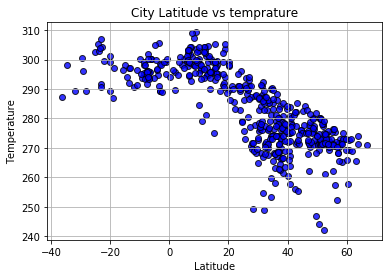

In [21]:
# Build a scatter plot for each data type
plt.scatter(citi_select["Latitude"], 
            citi_select["temperature"],
            edgecolor="black", linewidths=1, marker="o", c= "b",
            alpha=0.8)

plt.title("City Latitude vs temprature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Final Results/Latitude_Temperature.png")

# Show plot
plt.show()

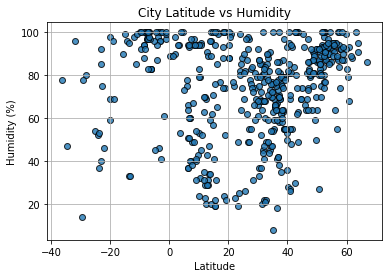

In [22]:
# Build a scatter plot for each data type
plt.scatter(citi_select["Latitude"], 
            citi_select["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Final Results/Latitude_Humidity.png")


# Show plot
plt.show()

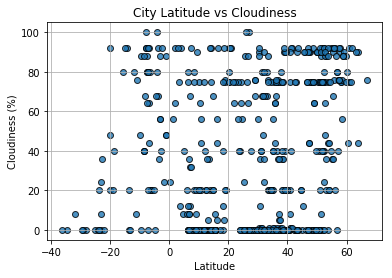

In [23]:
# Build a scatter plot for each data type
plt.scatter(citi_select["Latitude"], 
            citi_select["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)# #,label="Zip Codes")

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Final Results/Latitude_Cloudiness.png")


# Show plot
plt.show()

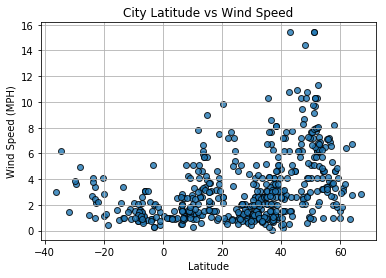

In [24]:
# Build a scatter plot for each data type
plt.scatter(citi_select["Latitude"], 
            citi_select["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)# #,label="Zip Codes")

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Final Results/Latitude_Wind Speed.png")


# Show plot
plt.show()